# Analyzing the Demand for Bike Sharing

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

For this project, we will explore a dataset from Capital Bikeshare, a bike-sharing program in Washington, D.C. It is interesting to discover bike usage patterns with weather condition and the nature of the day.

# I. Acquire the Dataset

1. Download the data `Bike-Sharing-Dataset.zip` file from [Bike Sharing dataset in the Machine Learning Repository at UC Irvine](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). Unzip the file and obtain file `day.csv`. Read the description of the dataset to learn the meaning of values in each column.

2. Load the data from `day.csv` as a Pandas data frame. Display its first 5 rows to confirm that the data is loaded correctly.

In [ ]:
import pandas as pd

Raw_data = pd.read_csv("day.csv")
Raw_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3. Display the shape of the data frame.

In [ ]:
print("Shape of DataFrame:", Raw_data.shape)

Shape of DataFrame: (731, 16)


4. Display the data type of each column

In [ ]:
print(Raw_data.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


5. The default data type for 'dteday' is `object`. Use [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to convert it to `datetime` type. After the conversion, display the data types again to confirm that the conversion is successful.

In [ ]:
Raw_data['dteday'] = pd.to_datetime(Raw_data['dteday'])
print(Raw_data.dtypes)

after conversion
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


6. Create a new column 'year' by extracting the year value from the datetime of each row.

In [ ]:
Raw_data['yr'] = Raw_data['dteday'].dt.year

print(Raw_data.head())

   instant     dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1  2011     1        0        6           0   
1        2 2011-01-02       1  2011     1        0        0           0   
2        3 2011-01-03       1  2011     1        0        1           1   
3        4 2011-01-04       1  2011     1        0        2           1   
4        5 2011-01-05       1  2011     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  year  
0   985  2011  
1   801  2011  
2  1349  2011  
3  1562  2011  


7. Remove the "casual" column and the "registered" column, as we are solely interested in the total number of bike rentals, which is given in the "cnt" column. Also remove the following columns: 'instant', 'yr', 'atemp'. Display the first 5 rows again to confirm the removal of these columns.

In [ ]:
columns_to_remove = ['casual', 'registered', 'instant', 'yr', 'atemp']
new_data = Raw_data.drop(columns=columns_to_remove)

print(new_data)

        dteday  season  mnth  holiday  weekday  workingday  weathersit  \
0   2011-01-01       1     1        0        6           0           2   
1   2011-01-02       1     1        0        0           0           2   
2   2011-01-03       1     1        0        1           1           1   
3   2011-01-04       1     1        0        2           1           1   
4   2011-01-05       1     1        0        3           1           1   
..         ...     ...   ...      ...      ...         ...         ...   
726 2012-12-27       1    12        0        4           1           2   
727 2012-12-28       1    12        0        5           1           2   
728 2012-12-29       1    12        0        6           0           2   
729 2012-12-30       1    12        0        0           0           1   
730 2012-12-31       1    12        0        1           1           2   

         temp       hum  windspeed   cnt  year  
0    0.344167  0.805833   0.160446   985  2011  
1    0.363478

8. Display the number of missing values from each column.

In [ ]:
missing_values = new_data.isna().sum()

print(missing_values)

dteday        0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
year          0
dtype: int64


## II. Data Exploration

1. The season feature: split the data frame into four subsets according to the season value. You may call them `data_spring`, `data_summer`, `data_fall`, `data_winter`. Calculate and display the average bike rentals in each season.

In [ ]:
data_spring = new_data[new_data['season'] == 1]
data_summer = new_data[new_data['season'] == 2]
data_fall = new_data[new_data['season'] == 3]
data_winter = new_data[new_data['season'] == 4]


avg_rentals_spring = data_spring['cnt'].mean()
avg_rentals_summer = data_summer['cnt'].mean()
avg_rentals_fall = data_fall['cnt'].mean()
avg_rentals_winter = data_winter['cnt'].mean()


print("Average bk rental in Spring:", avg_rentals_spring)
print("Average bk rentals in Summer:", avg_rentals_summer)
print("Average bk rentals in Fall:", avg_rentals_fall)
print("Average bk rentals in Winter:", avg_rentals_winter)


Average bk rental in Spring: 2604.1325966850827
Average bk rentals in Summer: 4992.33152173913
Average bk rentals in Fall: 5644.303191489362
Average bk rentals in Winter: 4728.162921348315


2. The 'holiday' feature: calculate and display the average bike rentals for holidays and non-holidays, separately.

In [ ]:
avg_rentals_by_holiday = new_data.groupby('holiday')['cnt'].mean()

print("Average bk rental holidays & non-holidays:")
print(avg_rentals_by_holiday)


Average bk rental holidays & non-holidays:
holiday
0    4527.104225
1    3735.000000
Name: cnt, dtype: float64


3. The 'workingday' feature: calculate and display the average bike rentals for working days and weekends, separately.

In [ ]:
avg_rentals_by_workingday = new_data.groupby('workingday')['cnt'].mean()

print("Average bk rentals working days & weekends:")
print(avg_rentals_by_workingday)


Average bk rentals working days & weekends:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


4. The 'weathersit' feature: calculate and display the average bike-rentals for each weather type.

In [ ]:
avg_rentals_by_weather = new_data.groupby('weathersit')['cnt'].mean()

print("Average bike rentals for each weather type:")
print(avg_rentals_by_weather)


Average bike rentals for each weather type:
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


5. The 'temp' feature: as temperature is a countinous feature, its relationship with the 'count' feature can be visualized as a scatter plot. Create a scatter plot with 'temp' and 'count'. Label the axis correctly.

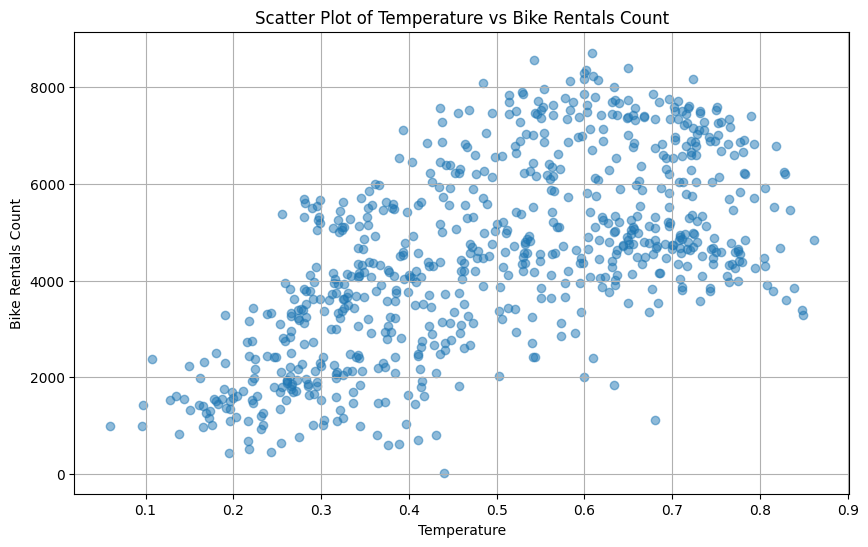

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(new_data['temp'], new_data['cnt'], alpha=0.5)


plt.xlabel('Temperature')
plt.ylabel('Bike Rentals Count')


plt.title('Scatter Plot of Temperature vs Bike Rentals Count')

plt.grid(True)
plt.show()


6. The 'windspeed' feature: create a scatter plot to show the relatioinship between the number of bike rentals and the windspeed.

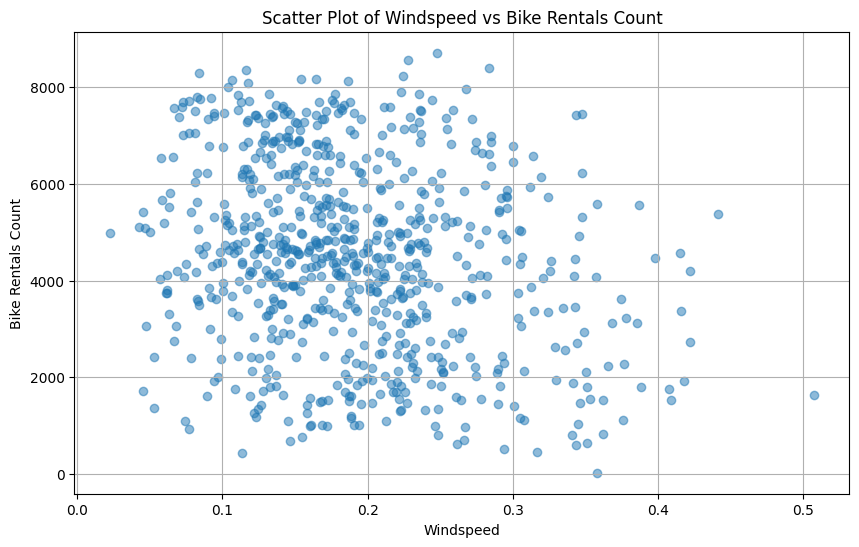

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(new_data['windspeed'], new_data['cnt'], alpha=0.5)

plt.xlabel('Windspeed')
plt.ylabel('Bike Rentals Count')


plt.title('Scatter Plot of Windspeed vs Bike Rentals Count')

plt.grid(True)
plt.show()


7. The 'year' feature: calculate and display the average bike rentals in each year.

In [ ]:
avg_rentals_by_year = new_data.groupby('year')['cnt'].mean()

print("Average bk rentals for each year:")
print(avg_rentals_by_year)


Average bk rentals for each year:
year
2011    3405.761644
2012    5599.934426
Name: cnt, dtype: float64


8. What observations can you conclude from the data exploration?

**Answer:**



First we start with seasonal variations. From our discoveries we found significant variation in bike rentals in some seasons than others. The results were surprising because fall had the most rentals and spring has the least average. My assumption is that since spring has the most rainiest days and in fall people want to stay out as less as possible, which is shows in the data.

Then we moved on with looking for any correlations between holidays vs non-holidays rental avg. We see almost a 1000 less bike rentals in holidays and we can expect that since people are spending their time at home.

Now we lookinto the working days vs weekend rentals. Surprisingly the data shows very simmilair results. If we think of possible resons we can think of it as, people are still going out on weekends infact a couple hundred more than weekdays.

Weather impact, is also something that we looked into for better understanding of the data. Ofcourse, we expect the weather to affect the rental substantially because no one likes gettting wet and the data supports the hypothesis.

Looking into temperature impacact, There appears to be a relationship between temperature and bike rentals, with potentially higher rentals observed at certain temperature ranges.

Windspeed impact is also something we investigated. We found that this correlation is weak, which means that if we are looking for better conclusive evidence that wind affect ridership we need to lookinto this more with better data.

Lastly, we looked into the yearly avarage bike ridership. We saw a significant jump from 2011 to 2012. This may be because of the expantion of the program or overall better insentives for riding.

Overall, we touched apon a lot of data that discribes a story behind why & what affects the Capital bikeshare system.


